# Project - Market Segmentation of bank customer using Unsupervised Learning! #
## By- LAKSHYA TEKWANI ##


In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans

In [2]:
#loading the csv into pandas dataframe
creditcard_df = pd.read_csv('CC GENERAL.csv')

In [3]:
#checking the dimensions of the dataframe
creditcard_df.shape

(8950, 18)

In [4]:
#analysing the data
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
#checking the data and anlysing various features
creditcard_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [6]:
#lets see who made the largest ONEOFF_PURCHASES
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [7]:
# lets see the largest Cash_Advance Transaction
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

In [8]:
# lets see the who made largest Cash_Advance Transaction and realise that he is not paying installments in full
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [9]:
# cheching the data type of the data
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<AxesSubplot:>

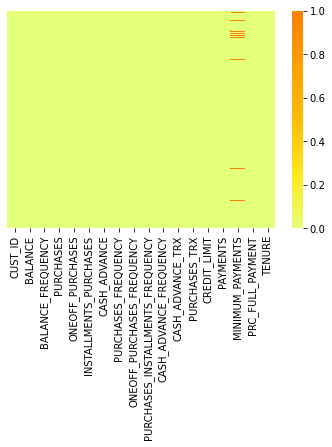

In [10]:
#checking if any cell is NULL
sns.heatmap(creditcard_df.isnull(), yticklabels = False,  cmap="Wistia")

In [11]:
# instead of heatplot lets see it numericall the total number of null values
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
# filling the null values with mean of MINIMUM_PAYMENTS column 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [13]:
# filling the null values with mean of CREDIT_LIMIT column 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<AxesSubplot:>

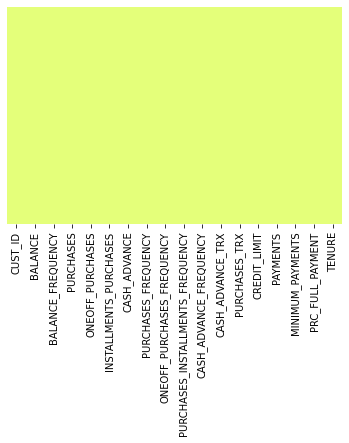

In [14]:
#checking if any cell is NULL still
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Wistia")

In [15]:
# checking if any cell is NULL
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [16]:
#Removing the customer id because it is unique and will not help in K-means
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [17]:
#after removing CUST_id analysing data again
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [18]:
#cheching the number of columns changed from 18 to 17
n = len(creditcard_df.columns)
n

17

In [19]:
#cheching the remaning column names 
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

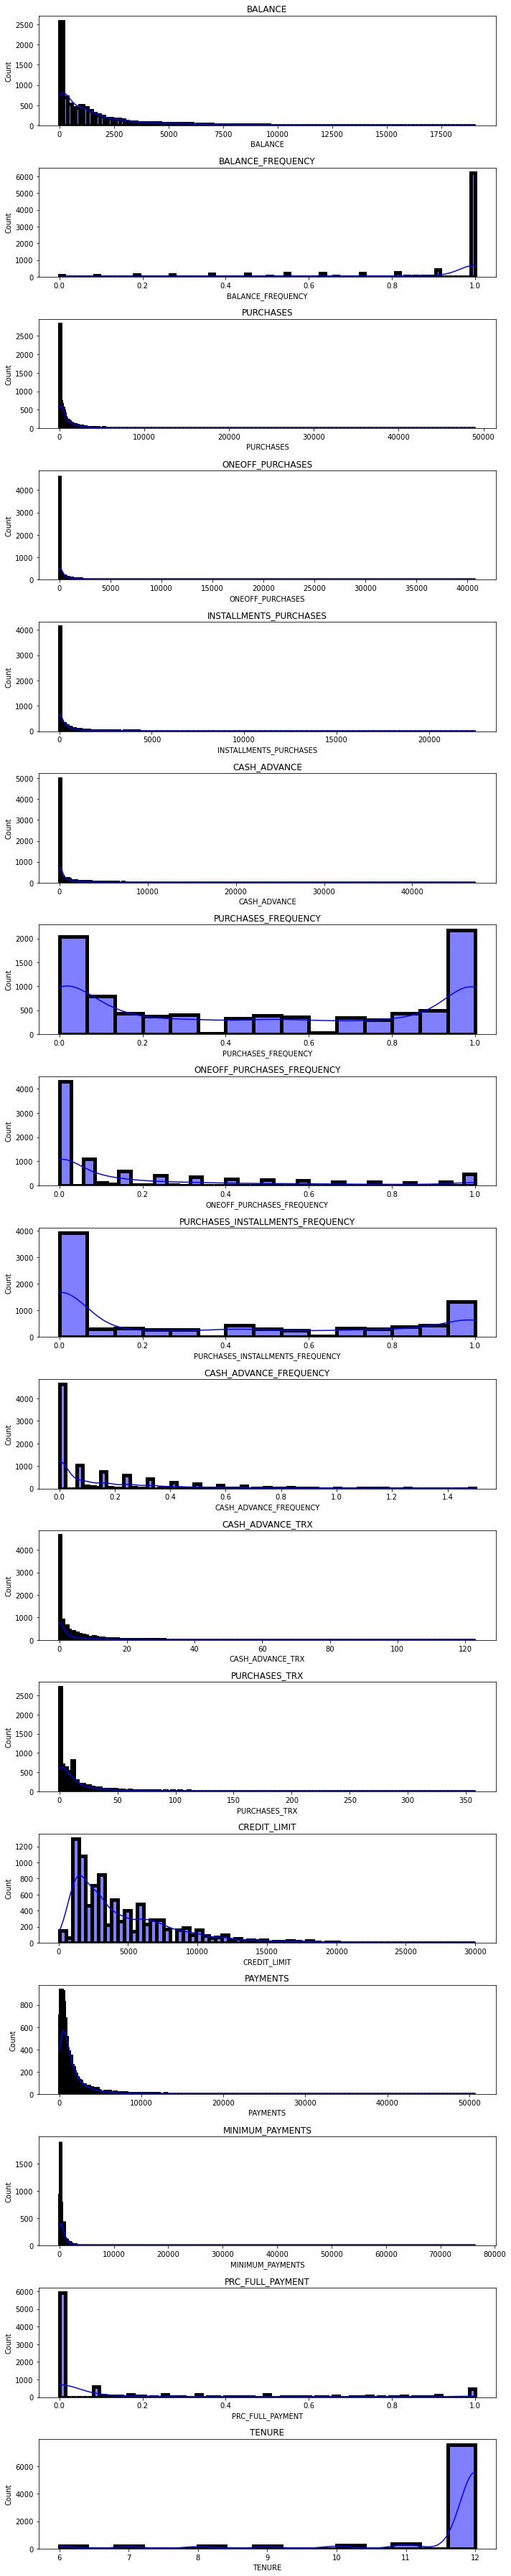

In [20]:
#plotting all the values on the columns on the graph
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.histplot(data=creditcard_df[creditcard_df.columns[i]],linewidth=5,color='b',kde=True)
    plt.title(creditcard_df.columns[i])

plt.tight_layout()

<AxesSubplot:>

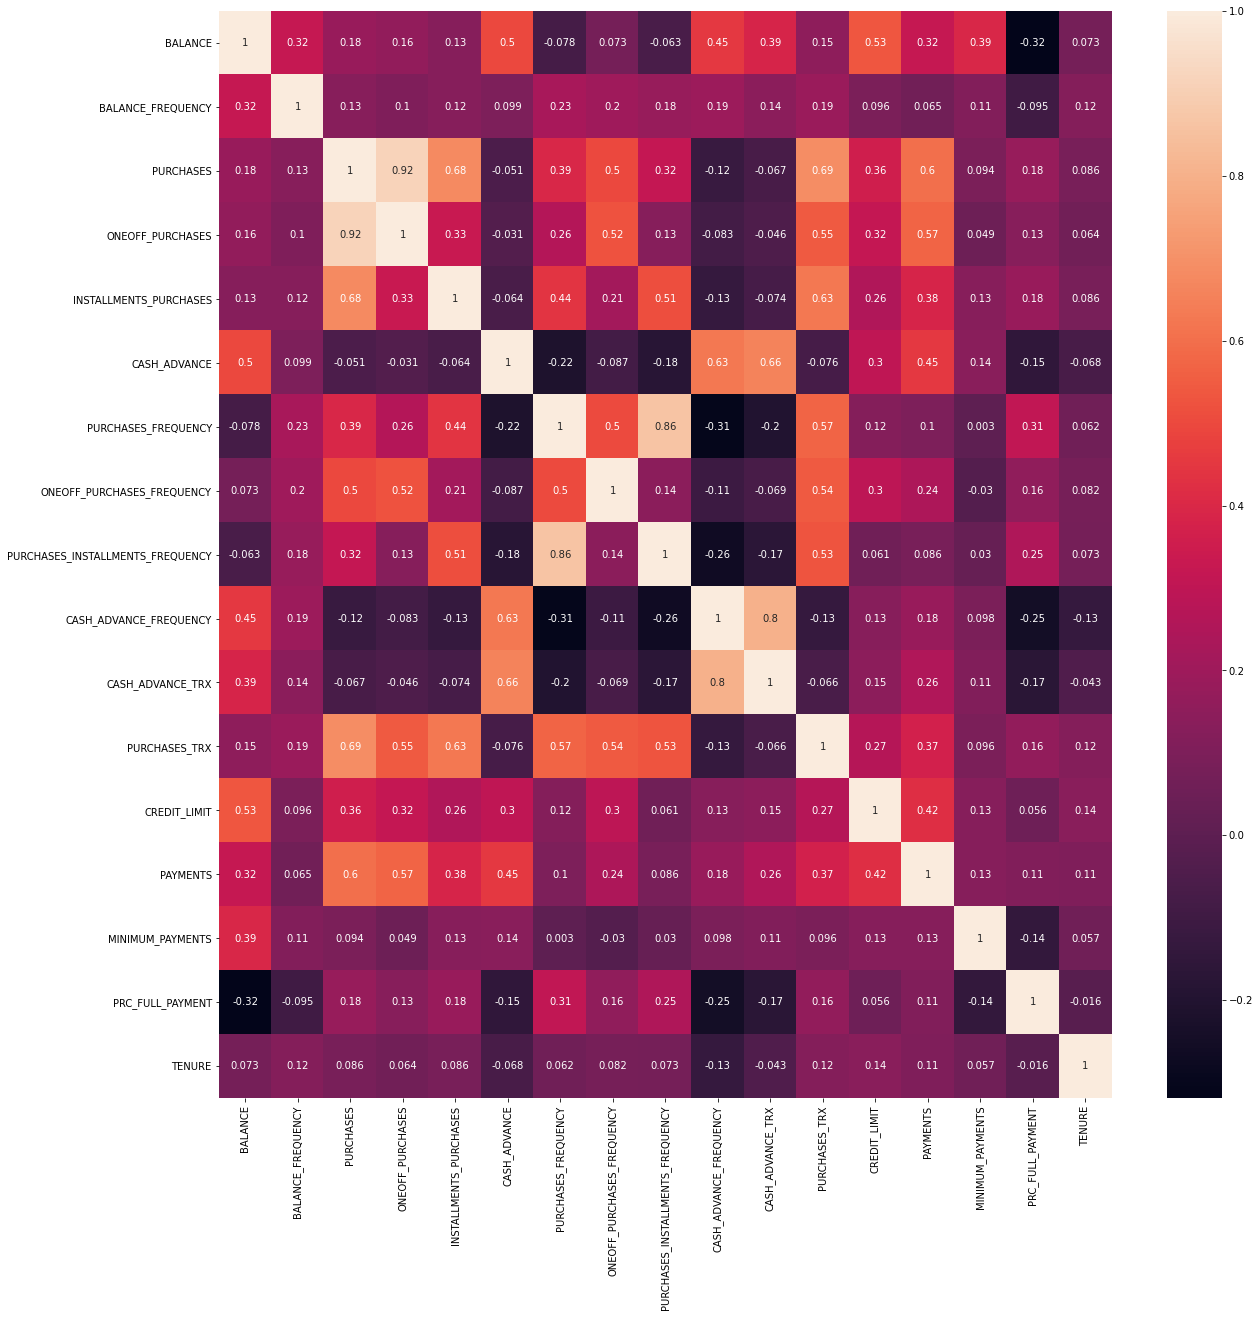

In [21]:
# plotting the co-realtion
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [22]:
#using the sckitlearn to scale the data and normalise it 
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [23]:
#checking the shape of scaled data 
creditcard_df_scaled.shape

(8950, 17)

In [24]:
#checking the values of scaled data
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

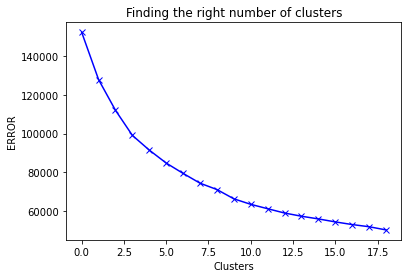

In [25]:
# plotting the error for different different values of K and using the knee point to get the optimum value of k
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('ERROR') 
plt.show()

### VALUES MAY CHANGE BECAUSE OF CHANGE IN INTIAL CENTEROIDS ##

In [26]:
# I personally feel that k=8 is the most optimised value of k
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [27]:
#there are 8 clusters each having 17 features as its centre
kmeans.cluster_centers_.shape

(8, 17)

In [28]:
# getting the cluster centres with the scaled values
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.027822,0.402697,-0.363266,-0.242628,-0.413061,-0.073046,-0.896141,-0.406575,-0.793813,0.141919,-0.003886,-0.494519,-0.293057,-0.245100,-0.003782,-0.453919,0.270607
1,-0.689187,0.146308,0.150583,0.017057,0.324242,-0.448821,0.923043,0.384551,0.739958,-0.642453,-0.458227,0.249203,0.143074,-0.101981,-0.291042,2.172631,0.187558
2,0.804265,0.474697,2.138432,1.756938,1.828474,-0.193371,1.158942,1.730366,1.099548,-0.296641,-0.210594,2.557005,1.191073,1.191044,0.358630,0.225787,0.324091
3,-0.152500,0.399820,0.046345,-0.041449,0.185645,-0.323471,0.923471,0.262092,0.824741,-0.392080,-0.314430,0.250734,-0.167551,-0.154508,0.008713,-0.334421,0.289401
4,1.694087,0.393012,-0.209727,-0.143219,-0.232836,2.061699,-0.456252,-0.167493,-0.418092,1.945963,1.976011,-0.255929,1.040024,0.850283,0.546782,-0.389971,0.063027
5,-0.699450,-2.190441,-0.322267,-0.243102,-0.315239,-0.315320,-0.575005,-0.458367,-0.447304,-0.513097,-0.370101,-0.426230,-0.194923,-0.208223,-0.254012,0.118685,0.196910
6,-0.330968,-0.343592,-0.282512,-0.198956,-0.302098,0.071633,-0.195183,-0.266590,-0.235749,0.312320,0.002112,-0.385861,-0.562938,-0.390576,-0.205772,-0.035587,-3.193214
7,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900


In [29]:
# getting the actual values from the scaled centres
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1622.384513,0.972666,227.081258,189.725246,37.541848,825.690289,0.130686,0.081168,0.048956,0.163544,3.222306,2.417950,3428.188760,1023.604523,855.391863,0.020951,11.879459
1,129.990684,0.911930,1324.928491,620.749073,704.275302,37.673300,0.860812,0.317177,0.658516,0.006583,0.121767,20.904095,5015.010286,1437.919073,185.945570,0.789172,11.768319
2,3238.484846,0.989722,5571.997966,3508.593842,2064.534068,573.363527,0.955490,0.718660,0.801426,0.075783,1.811676,78.267420,8828.060264,5181.098770,1699.978030,0.219753,11.951036
3,1247.058522,0.971984,1102.221288,523.641053,578.943843,300.537356,0.860984,0.280645,0.692210,0.056685,1.103074,20.942134,3884.829534,1285.857039,884.511969,0.055902,11.904611
4,5090.573778,0.970372,555.119798,354.723448,200.517241,5302.351224,0.307235,0.152491,0.198277,0.524551,16.733650,8.348395,8278.483407,4194.629724,2138.459335,0.039655,11.601665
5,108.628306,0.358375,314.676273,188.938456,126.001171,317.630241,0.259573,0.065718,0.186667,0.032468,0.723159,4.115350,3785.239081,1130.359673,272.242927,0.188428,11.780834
6,875.592600,0.795877,399.613451,262.210482,137.884510,1129.088262,0.412014,0.122929,0.270744,0.197643,3.263242,5.118780,2446.251123,602.464651,384.664534,0.143306,7.243981
7,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000


## First Customer Cluster ##
-> the most economical customer , doesn't spends to much and doesnt tends to pay money in full. So not much to offer him 
## Second Customer Cluster ##
-> the smart spender , maintains low balance and pays pretty well therefore using the credit card most effectively , so we need to offer more credit limit 
## Third Customer Cluster ##
-> this customer with highest purchase frequency and does pretty good purchases in form of oneoff purchases and installments as well and pays the money pretty well. so we can provide him with transactional offers or points so he can use more and more of our services.
## Fourth Customer Cluster ##
-> the average customer , one who is most concerned to buy things on installments. so we can provide him with installments offers
## Fifth Customer Cluster ##
-> the one who doesn't spends much , and keeps his balance full and uses cash advances the most and pays well. we can offer him some discounts related to cash_advances in order to increase his transactions
## Sixth Customer Cluster ##
-> one of the defaulter customer , he doesnt maintains his balance and he is offered very low credit limit . we should encourage him to pay installments in time and maybe remove him from our base as he may not be able to pay his debt on time.
## Seventh Customer Cluster ##
-> another economical customer who uses most of his money in form of cash_advances and doesn't repay well. We should encourage him to use installments and give him offers related to that.
## Eighth Customer Cluster ##
-> The top spender , maintains his balance, highest purchases both one-off and installments with high credit limit and also pays pretty well. we should offer him more and more transactional offers and maybe we can increase his limits also.

In [30]:
#printing the label i.e a numeric value indicating which customer belongs to which cluser
print(labels.shape)

(8950,)


In [31]:
#getting the fitted model
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([2, 0, 1, ..., 4, 2, 2])

In [32]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


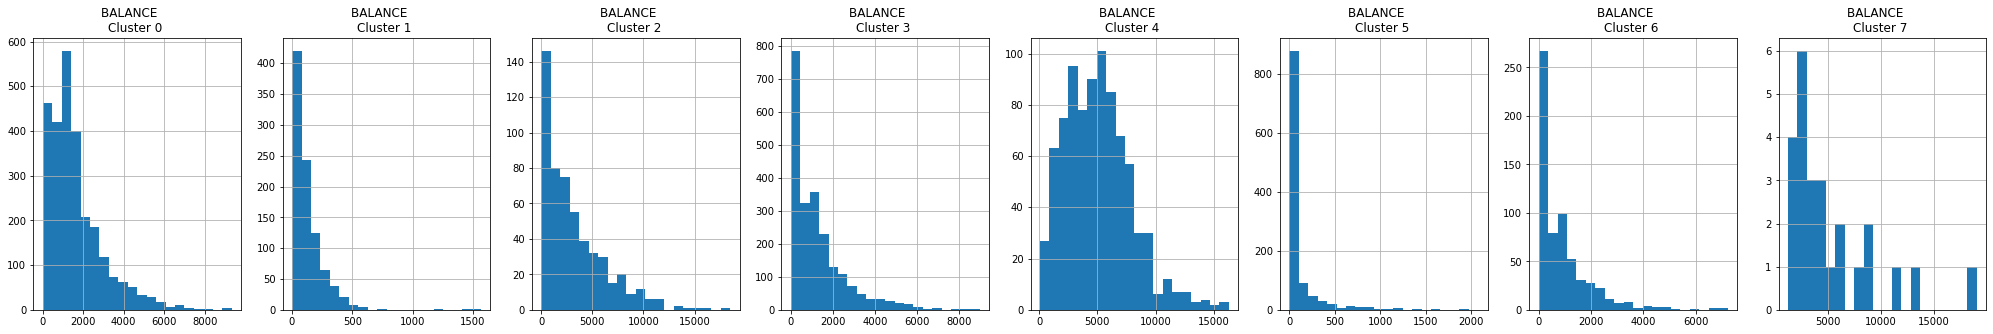

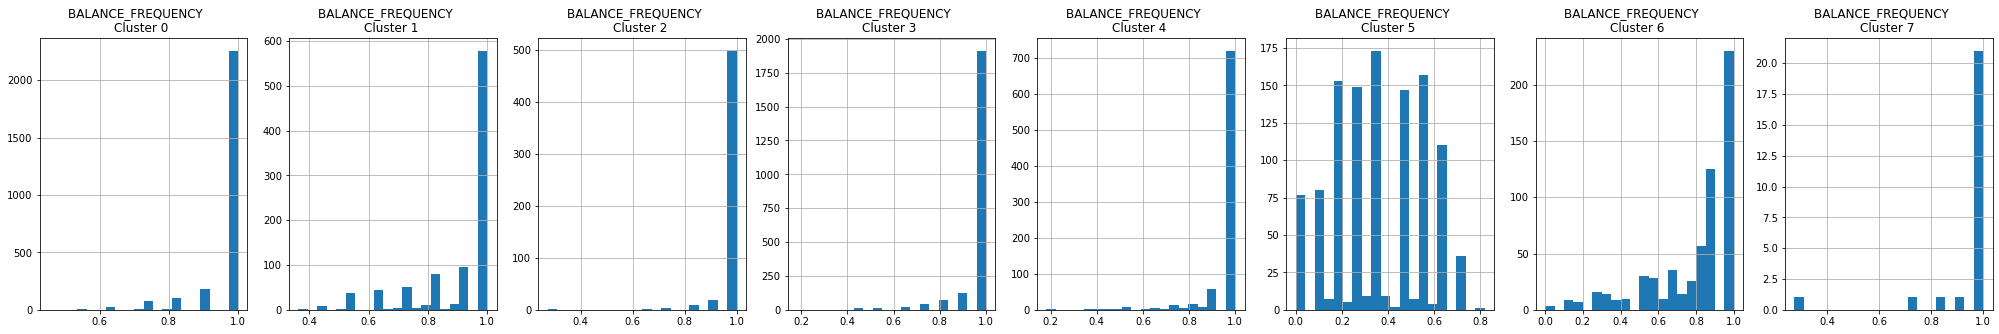

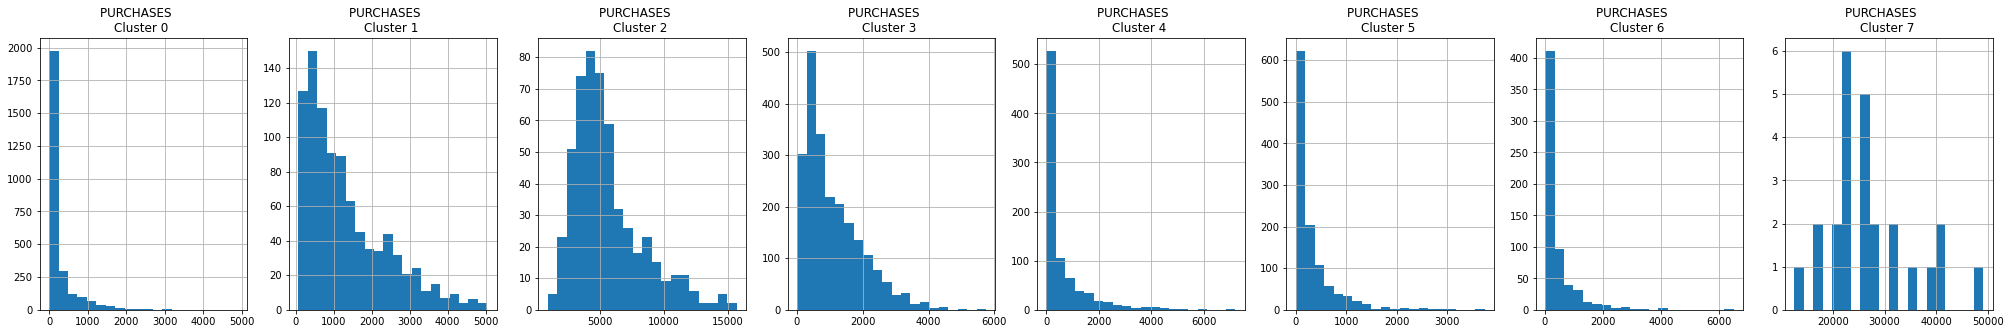

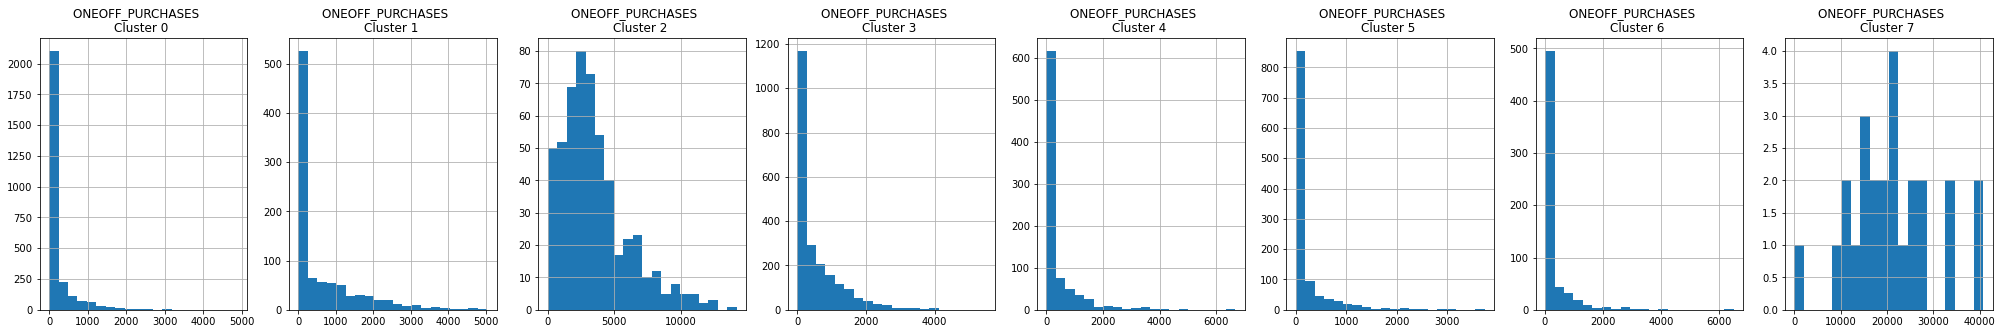

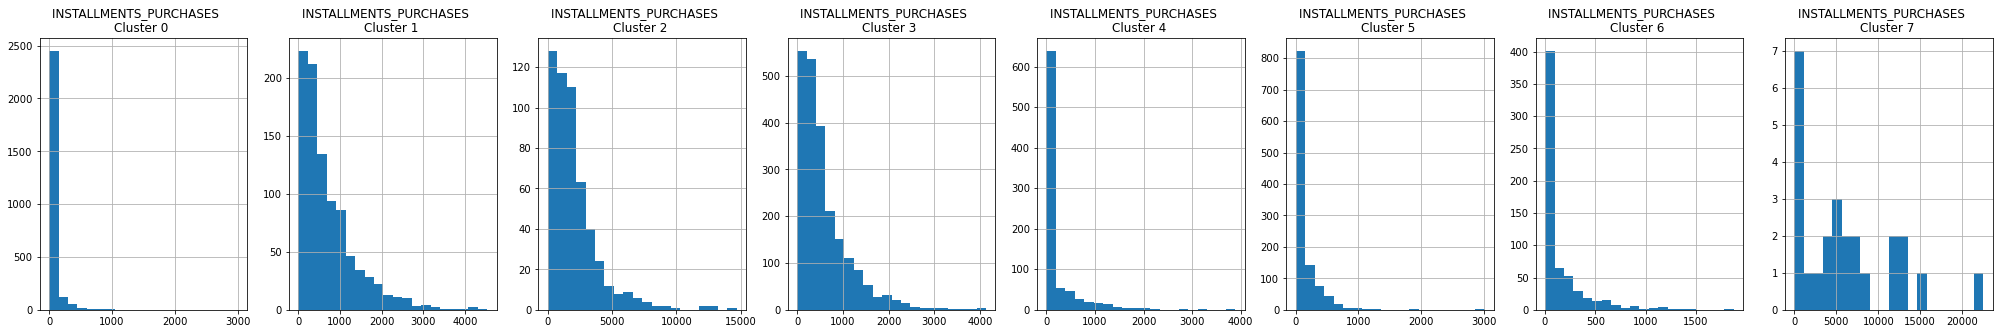

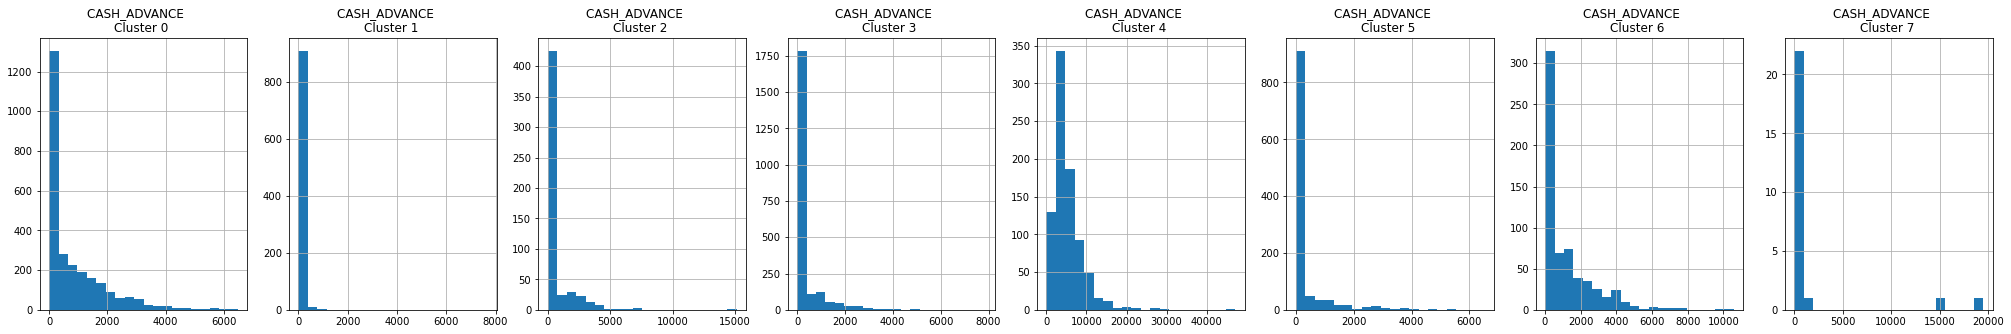

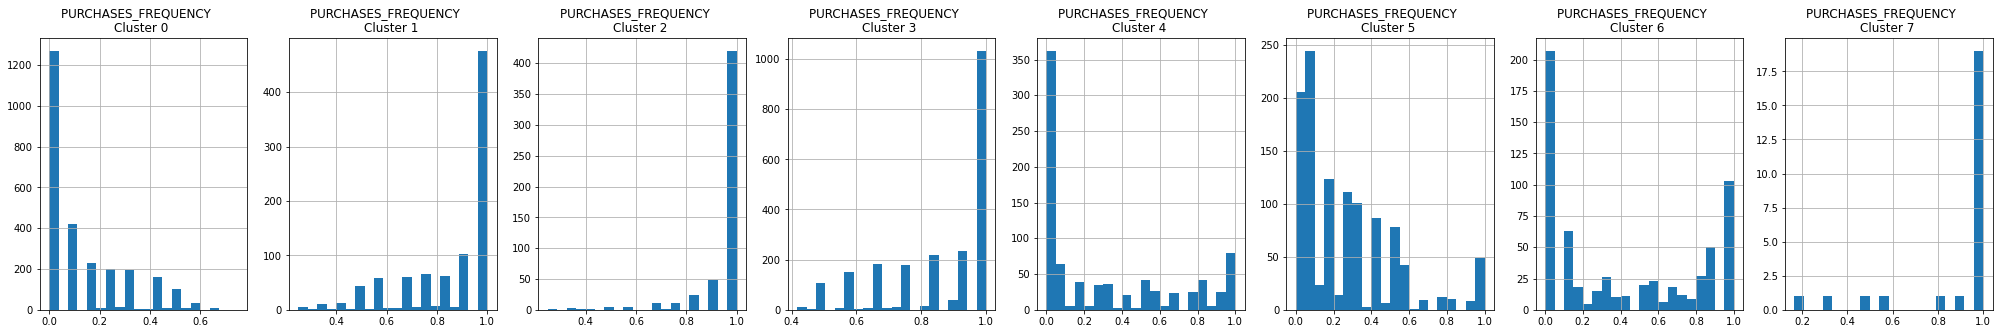

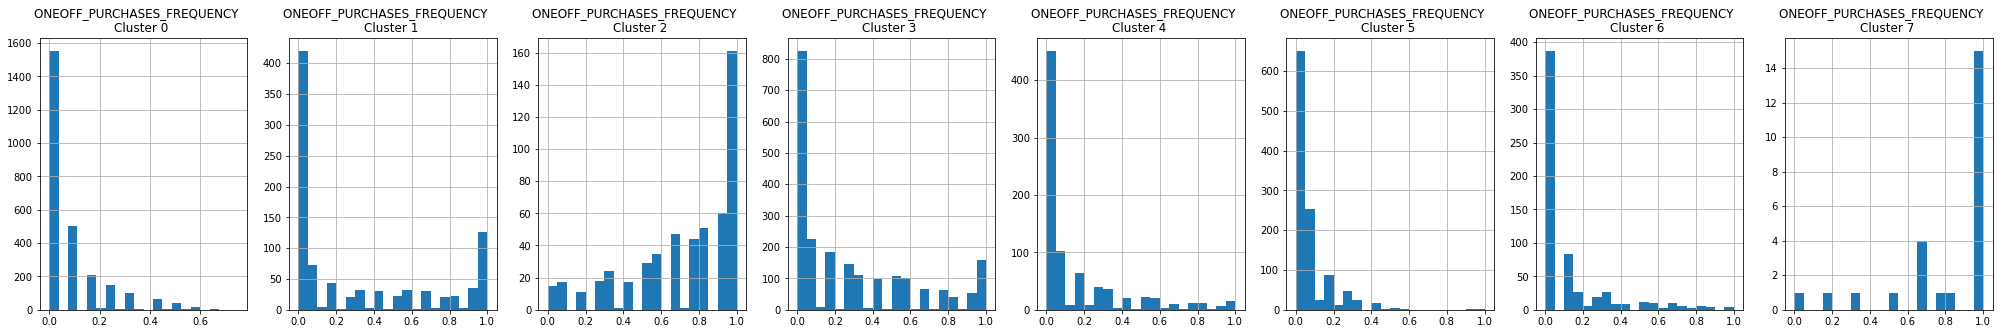

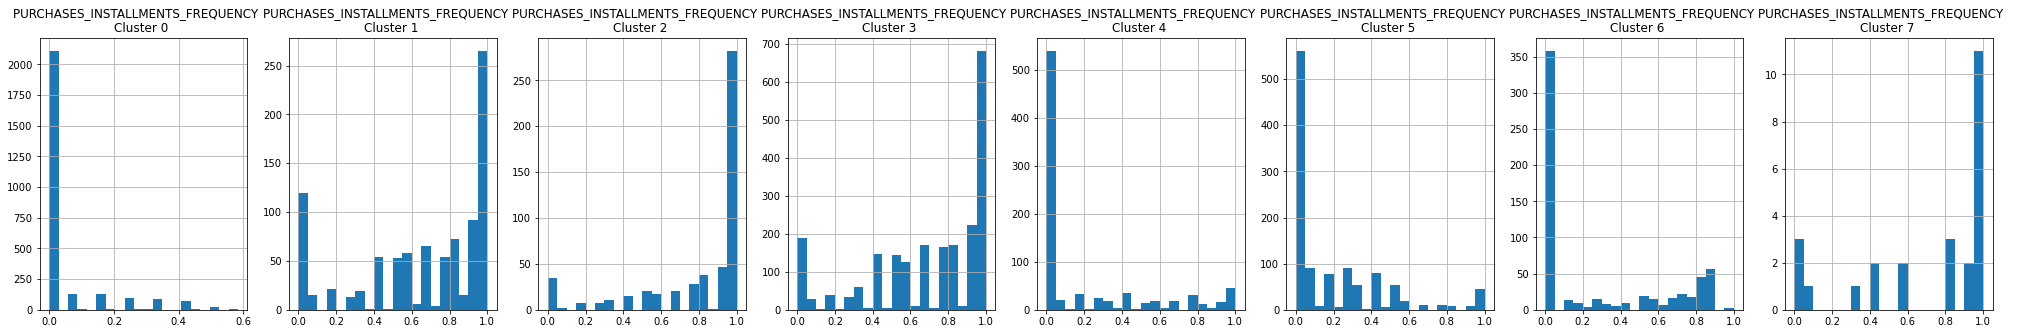

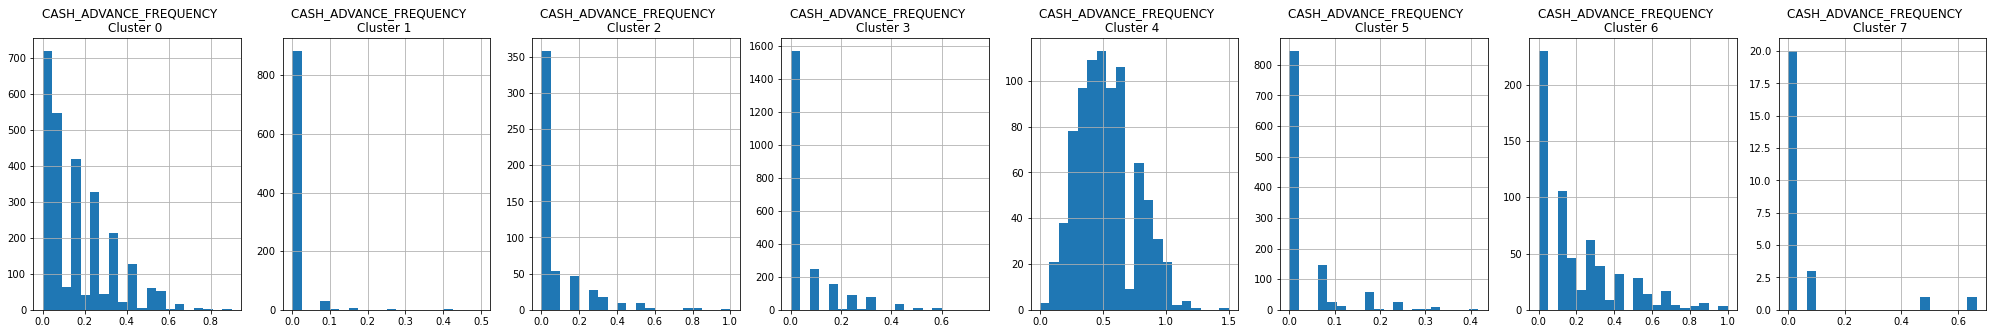

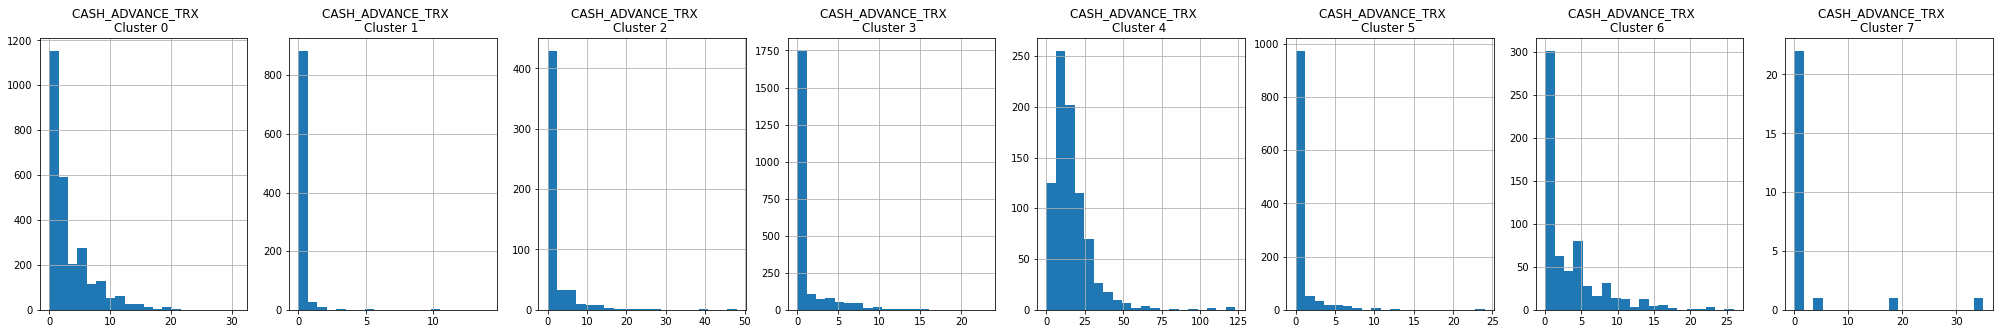

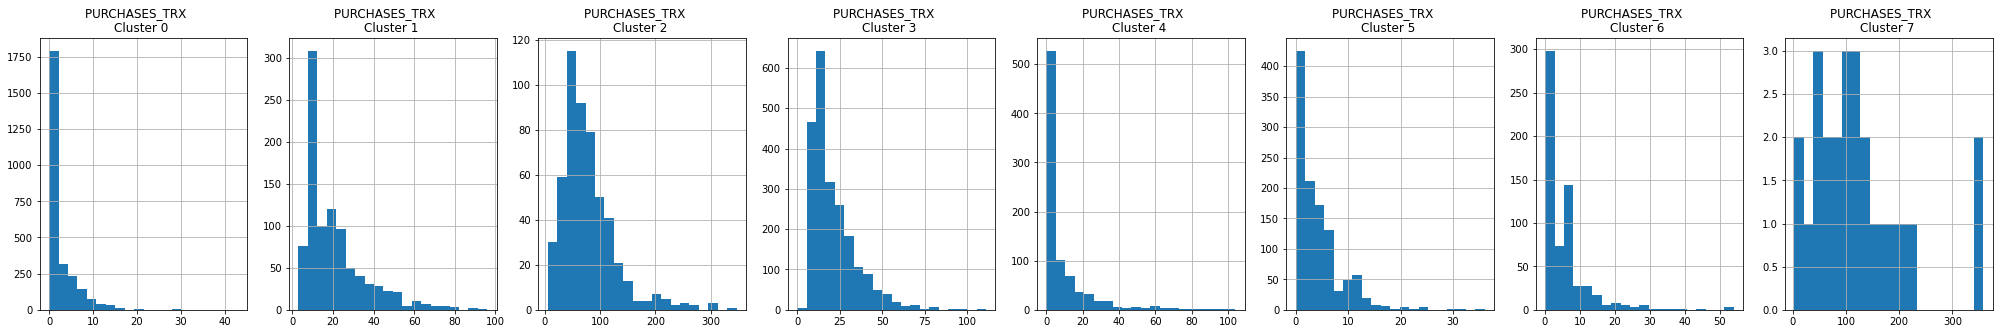

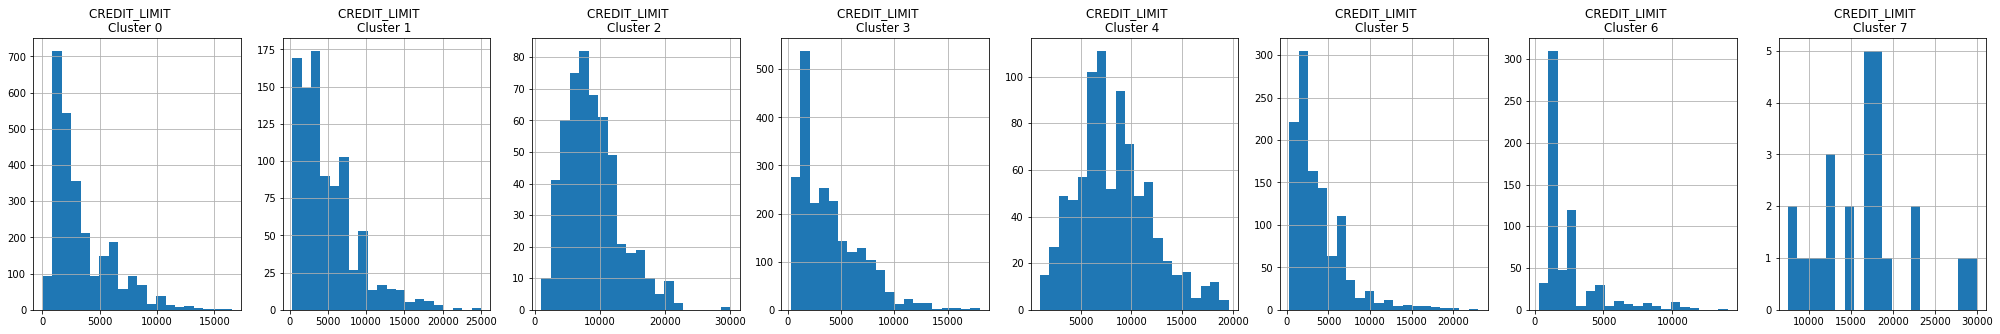

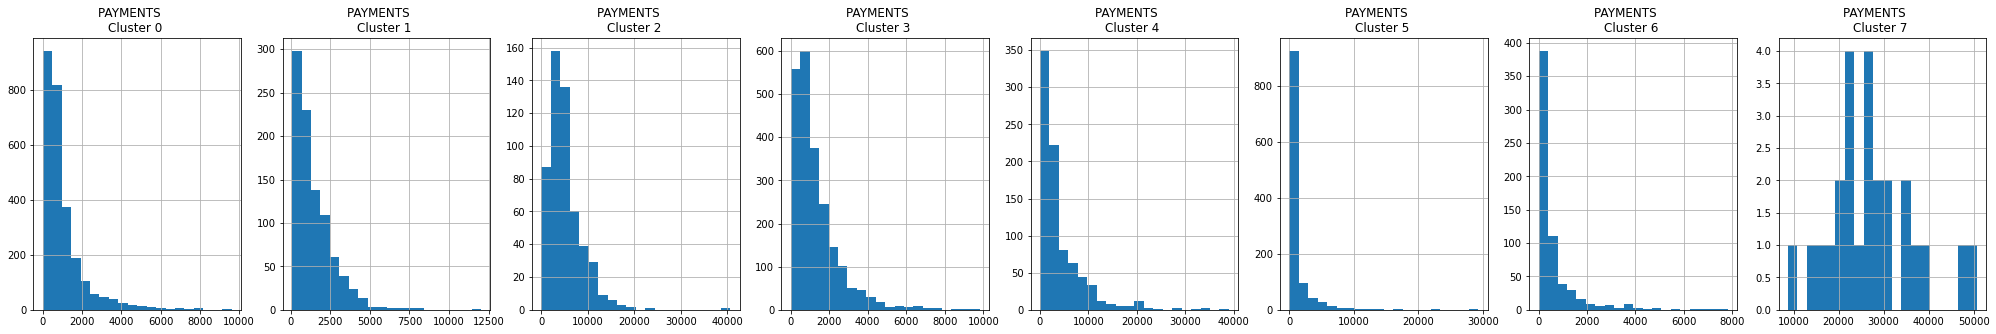

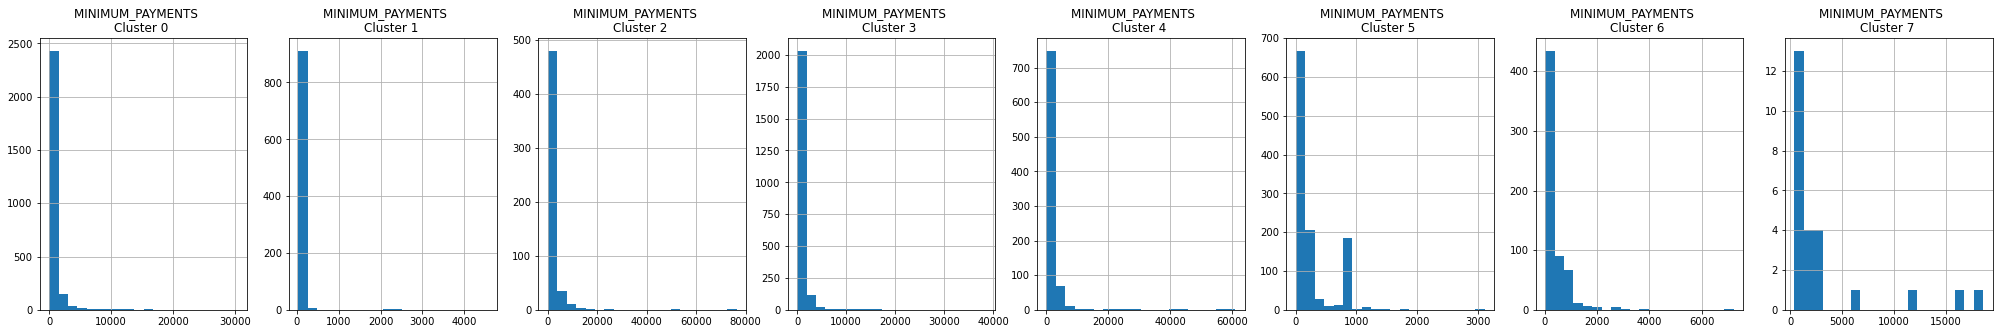

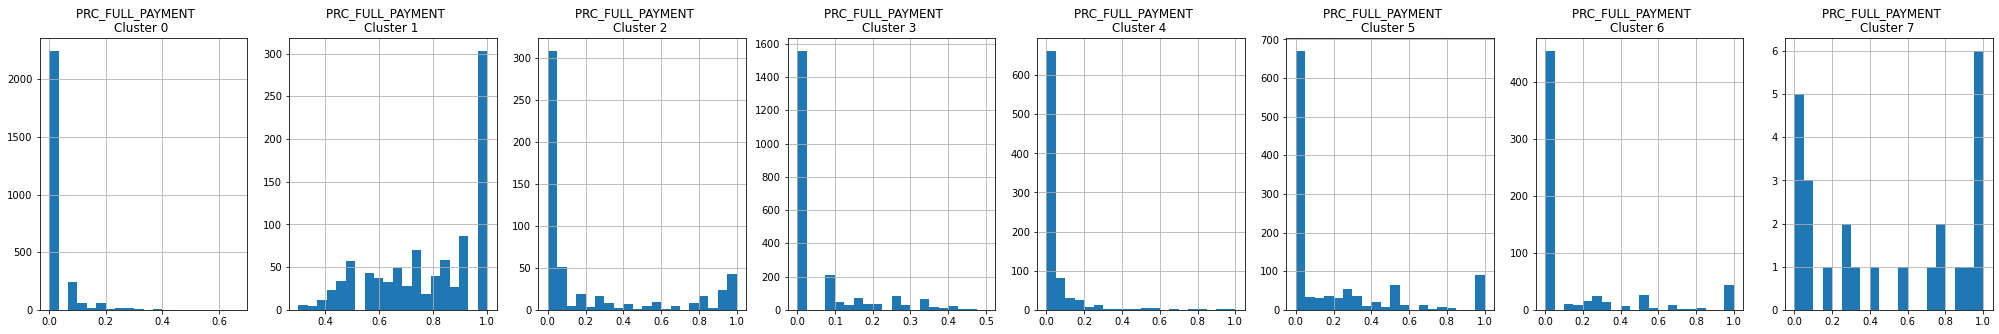

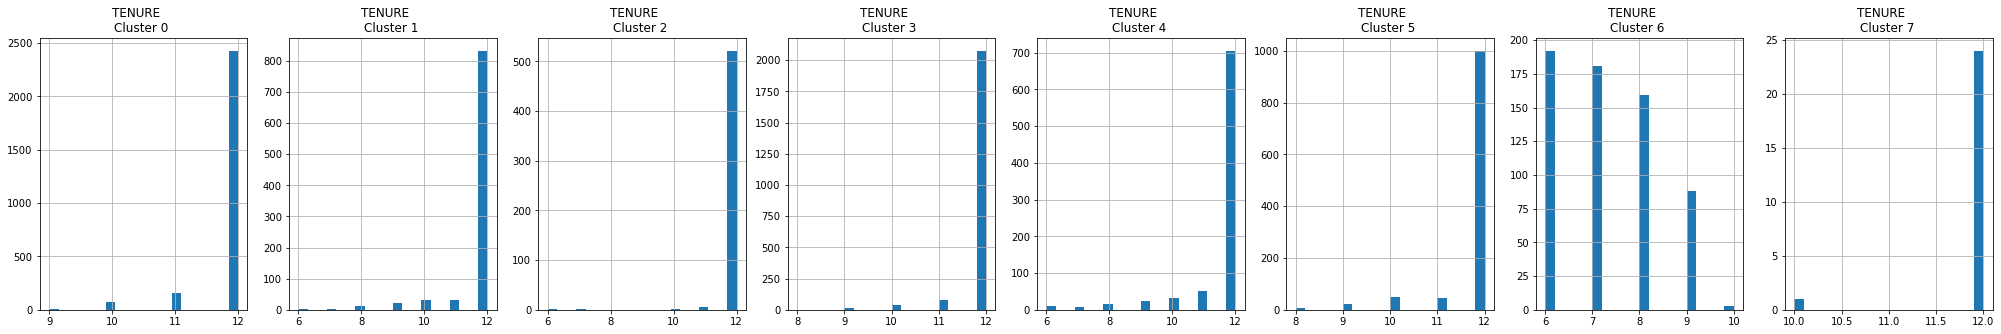

In [33]:
#plotting the features of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()